In [19]:
import pandas as pd 
df=pd.read_csv("circus_rides_death_analysis.csv")
df

,Year,Ride,Location,Total_Visitors,Accidents,Deaths,Injuries,Cause,Inspection_Status
0,2000,Ferris Wheel,Brazil,12296,0,0,0,Human Error,Regular
1,2000,Roller Coaster,India,11717,2,2,0,Poor Maintenance,Regular
2,2000,Swing Ride,USA,11140,6,1,5,Unknown,NaN
3,2000,Drop Tower,USA,41781,6,5,1,Unknown,Irregular
4,2000,Bumper Cars,India,34439,8,0,8,Human Error,NaN
...,...,...,...,...,...,...,...,...,...
170,2024,Swing Ride,Brazil,22919,13,13,0,Poor Maintenance,Irregular
171,2024,Drop Tower,India,34935,4,3,1,Human Error,NaN
172,2024,Bumper Cars,Japan,13946,2,1,1,Poor Maintenance,Irregular
173,2024,Haunted House,Australia,38275,8,0,8,Weather Issue,NaN


In [20]:
df.shape

(175, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               175 non-null    int64 
 1   Ride               175 non-null    object
 2   Location           175 non-null    object
 3   Total_Visitors     175 non-null    int64 
 4   Accidents          175 non-null    int64 
 5   Deaths             175 non-null    int64 
 6   Injuries           175 non-null    int64 
 7   Cause              175 non-null    object
 8   Inspection_Status  115 non-null    object
dtypes: int64(5), object(4)
memory usage: 12.4+ KB


In [22]:
df.describe()

,Year,Total_Visitors,Accidents,Deaths,Injuries
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2012.000000,28295.245714,7.474286,3.628571,3.845714
std,7.231794,12708.870327,4.655755,3.661588,3.815301
min,2000.000000,5110.000000,0.000000,0.000000,0.000000
25%,2006.000000,17460.000000,4.000000,1.000000,1.000000
50%,2012.000000,29836.000000,7.000000,2.000000,3.000000
75%,2018.000000,39178.000000,11.000000,6.000000,6.000000
max,2024.000000,49388.000000,15.000000,15.000000,14.000000


In [23]:
df["Ride"].unique()

array(['Ferris Wheel', 'Roller Coaster', 'Swing Ride', 'Drop Tower',
       'Bumper Cars', 'Haunted House', 'Water Slide'], dtype=object)

In [24]:
df["Ride"].nunique()

7

In [25]:
df["Location"].unique()

array(['Brazil', 'India', 'USA', 'Germany', 'Japan', 'Australia', 'UK'],
      dtype=object)

In [26]:
df["Location"].nunique()

7

In [27]:
df.isnull().sum()

Year                  0
Ride                  0
Location              0
Total_Visitors        0
Accidents             0
Deaths                0
Injuries              0
Cause                 0
Inspection_Status    60
dtype: int64

In [28]:
df["Inspection_Status"]=df["Inspection_Status"].mode().min()

In [29]:
df.isnull().sum()

Year                 0
Ride                 0
Location             0
Total_Visitors       0
Accidents            0
Deaths               0
Injuries             0
Cause                0
Inspection_Status    0
dtype: int64

<Axes: xlabel='Total_Visitors'>

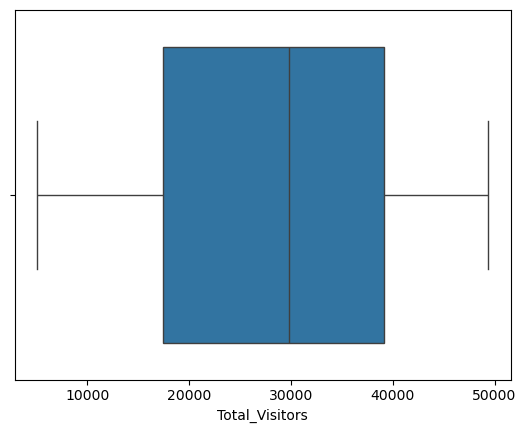

In [30]:
import seaborn as sns
sns.boxplot(x="Total_Visitors",data=df)

<Axes: xlabel='Accidents'>

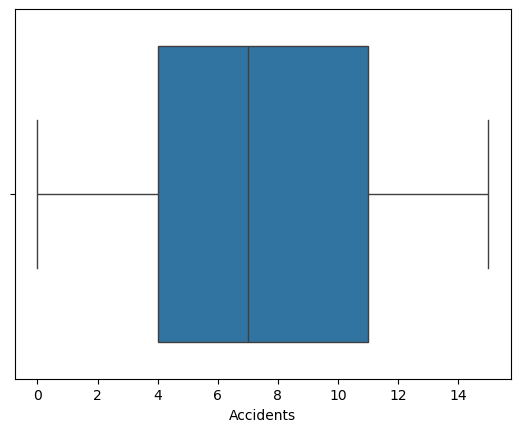

In [31]:
sns.boxplot(x="Accidents",data=df)

<Axes: xlabel='Deaths'>

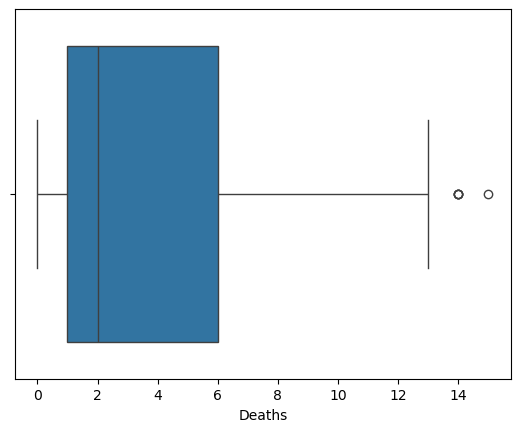

In [32]:
sns.boxplot(x="Deaths",data=df)

<Axes: xlabel='Deaths', ylabel='Count'>

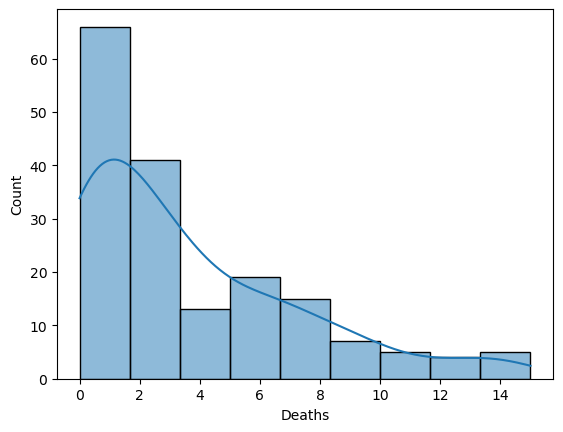

In [33]:
sns.histplot(x="Deaths",data=df,kde=True)

In [34]:
df.describe()

,Year,Total_Visitors,Accidents,Deaths,Injuries
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2012.000000,28295.245714,7.474286,3.628571,3.845714
std,7.231794,12708.870327,4.655755,3.661588,3.815301
min,2000.000000,5110.000000,0.000000,0.000000,0.000000
25%,2006.000000,17460.000000,4.000000,1.000000,1.000000
50%,2012.000000,29836.000000,7.000000,2.000000,3.000000
75%,2018.000000,39178.000000,11.000000,6.000000,6.000000
max,2024.000000,49388.000000,15.000000,15.000000,14.000000


In [35]:
import numpy as np
def replace_outliers(dataframe,feature):
    Q1=dataframe[feature].quantile(0.25)
    Q3=dataframe[feature].quantile(0.75)
    IQR=Q3-Q1
    a=Q1-1.5*IQR  # lower
    b=Q3+1.5*IQR  # upper

    dataframe[feature]=np.where(dataframe[feature]>b,b,dataframe[feature])
    dataframe[feature]=np.where(dataframe[feature]<a,a,dataframe[feature])

In [36]:
replace_outliers(df,"Deaths")

<Axes: xlabel='Deaths'>

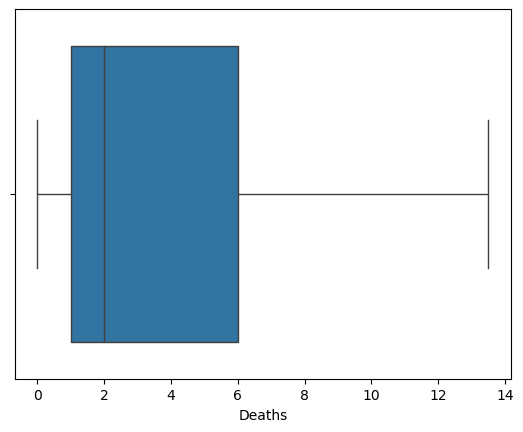

In [37]:
sns.boxplot(x="Deaths",data=df)

<Axes: xlabel='Injuries'>

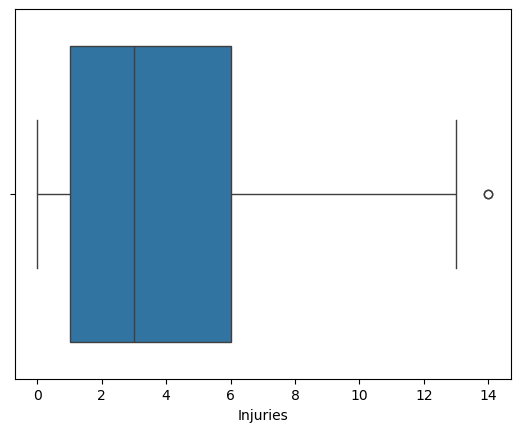

In [38]:
sns.boxplot(x="Injuries",data=df)

In [43]:
data=df.groupby("Year")[["Deaths","Accidents"]].sum()
data

,Deaths,Accidents
Year,,
2000,11.0,42
2001,20.0,26
2002,27.0,46
2003,25.0,56
2004,20.0,69
2005,17.0,31
2006,15.0,37
2007,18.0,46
2008,9.0,26


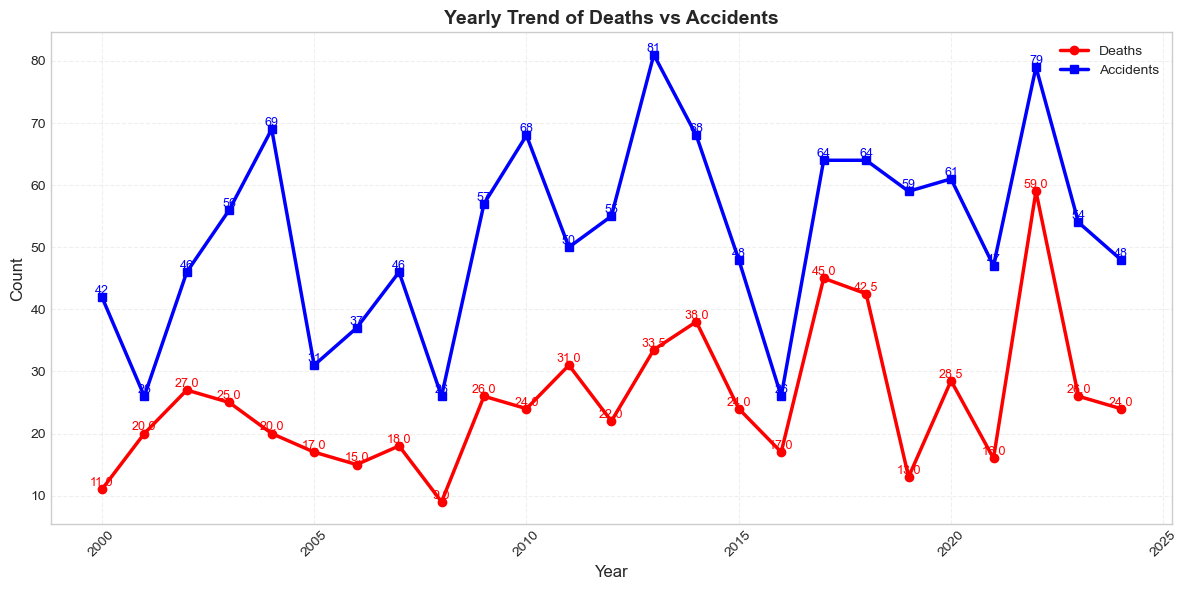

In [51]:
import matplotlib.pyplot as plt

# Group data
data = df.groupby("Year")[["Deaths","Accidents"]].sum()

# Plot
plt.figure(figsize=(12,6))
plt.plot(data.index, data["Deaths"], marker="o", linewidth=2.5, color="red", label="Deaths")
plt.plot(data.index, data["Accidents"], marker="s", linewidth=2.5, color="blue", label="Accidents")

# Add values on points
for x, y in zip(data.index, data["Deaths"]):
    plt.text(x, y+0.5, str(y), ha='center', fontsize=9, color="red")
for x, y in zip(data.index, data["Accidents"]):
    plt.text(x, y+0.5, str(y), ha='center', fontsize=9, color="blue")

# Styling
plt.title("Yearly Trend of Deaths vs Accidents", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
data=df.groupby("Ride")[["Deaths","Accidents","Injuries"]].sum()
data

,Deaths,Accidents,Injuries
Ride,,,
Bumper Cars,114.5,181,64
Drop Tower,88.0,197,109
Ferris Wheel,78.5,152,73
Haunted House,80.0,217,137
Roller Coaster,86.5,184,97
Swing Ride,85.0,183,98
Water Slide,99.0,194,95


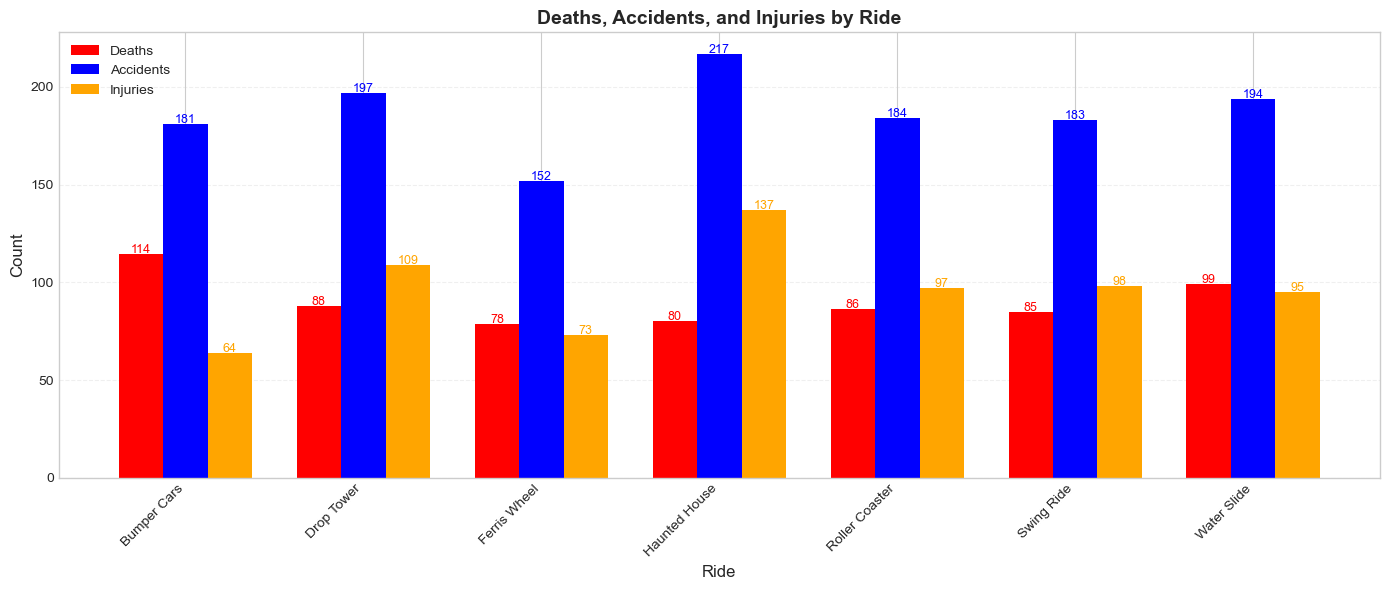

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Group data
data = df.groupby("Ride")[["Deaths","Accidents","Injuries"]].sum()

# Setup
x = np.arange(len(data.index))  # ride positions
width = 0.25  # bar width

plt.figure(figsize=(14,6))

# Bars
bars1 = plt.bar(x - width, data["Deaths"], width, label="Deaths", color="red")
bars2 = plt.bar(x, data["Accidents"], width, label="Accidents", color="blue")
bars3 = plt.bar(x + width, data["Injuries"], width, label="Injuries", color="orange")

# Add values on bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5, 
             str(int(bar.get_height())), ha='center', fontsize=9, color="red")
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5, 
             str(int(bar.get_height())), ha='center', fontsize=9, color="blue")
for bar in bars3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5, 
             str(int(bar.get_height())), ha='center', fontsize=9, color="orange")

# Styling
plt.title("Deaths, Accidents, and Injuries by Ride", fontsize=14, fontweight="bold")
plt.xlabel("Ride", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(x, data.index, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


In [53]:
data=df.groupby("Location")[["Deaths","Accidents","Injuries"]].sum()
data

,Deaths,Accidents,Injuries
Location,,,
Australia,80.0,165,83
Brazil,111.0,210,99
Germany,100.5,179,78
India,62.0,161,99
Japan,70.5,160,89
UK,120.5,260,139
USA,87.0,173,86


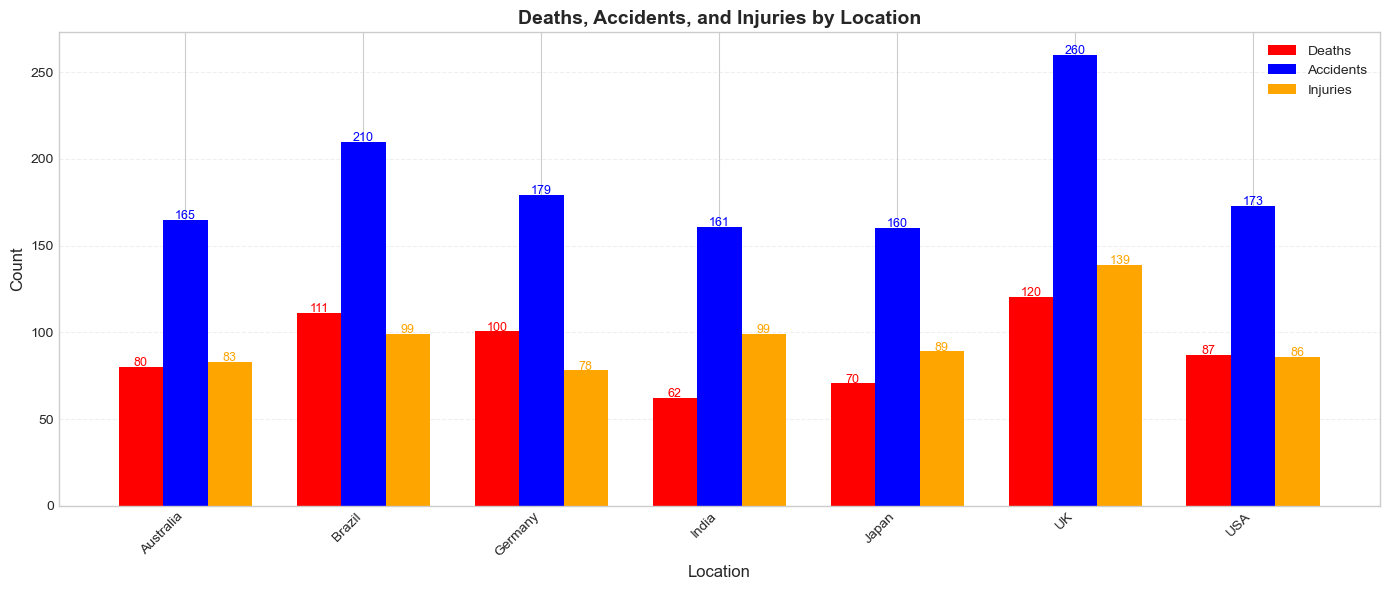

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Group data
data = df.groupby("Location")[["Deaths","Accidents","Injuries"]].sum()

# Setup
x = np.arange(len(data.index))  # location positions
width = 0.25  # bar width

plt.figure(figsize=(14,6))

# Bars
bars1 = plt.bar(x - width, data["Deaths"], width, label="Deaths", color="red")
bars2 = plt.bar(x, data["Accidents"], width, label="Accidents", color="blue")
bars3 = plt.bar(x + width, data["Injuries"], width, label="Injuries", color="orange")

# Add values on bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5,
             str(int(bar.get_height())), ha='center', fontsize=9, color="red")
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5,
             str(int(bar.get_height())), ha='center', fontsize=9, color="blue")
for bar in bars3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5,
             str(int(bar.get_height())), ha='center', fontsize=9, color="orange")

# Styling
plt.title("Deaths, Accidents, and Injuries by Location", fontsize=14, fontweight="bold")
plt.xlabel("Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(x, data.index, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()


In [56]:
data=df.groupby("Ride")["Cause"].sum()
data

Ride
Bumper Cars       Human ErrorWeather IssueUnknownUnknownWeather ...
Drop Tower        UnknownWeather IssueHuman ErrorWeather IssueUn...
Ferris Wheel      Human ErrorUnknownMechanical FailurePoor Maint...
Haunted House     Human ErrorHuman ErrorPoor MaintenanceUnknownH...
Roller Coaster    Poor MaintenanceWeather IssueWeather IssueMech...
Swing Ride        UnknownWeather IssuePoor MaintenanceMechanical...
Water Slide       Weather IssuePoor MaintenanceHuman ErrorMechan...
Name: Cause, dtype: object

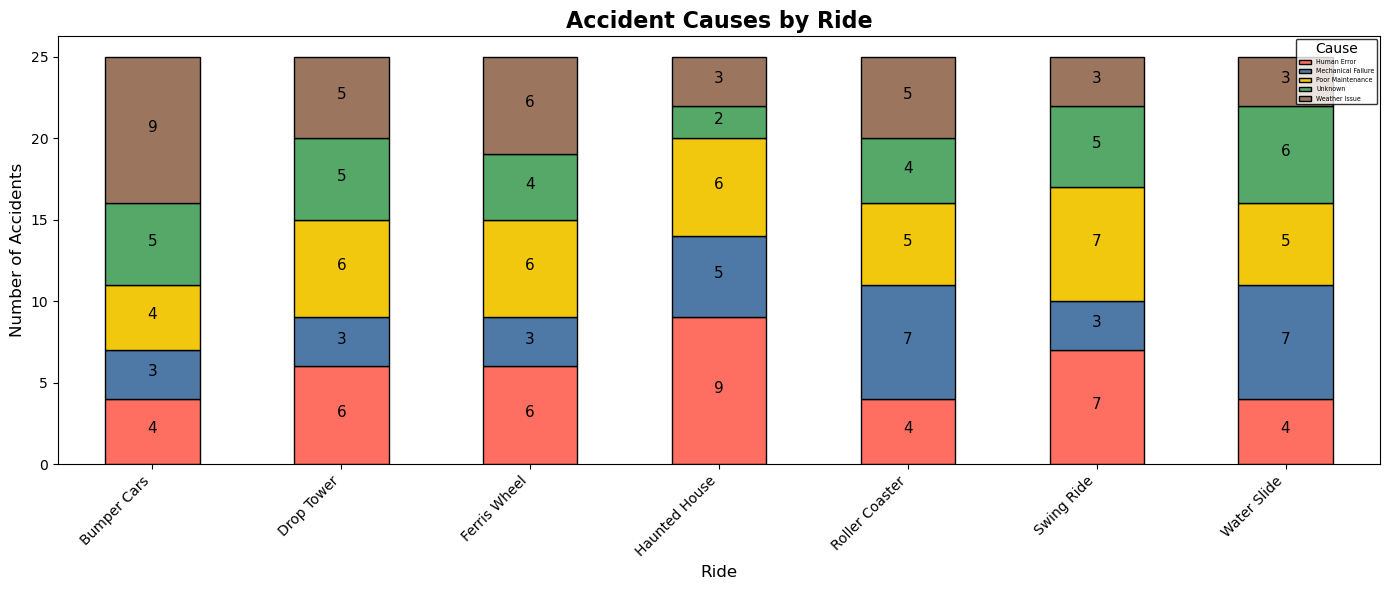

In [90]:
import matplotlib.pyplot as plt

# Prepare data (cause counts per ride)
data = df.groupby(["Ride", "Cause"]).size().unstack(fill_value=0)

# White background
plt.style.use("default")

# Attractive colors (manually picked palette)
colors = ["#FF6F61", "#4E79A7", "#F2C80F", "#55A868", "#9C755F"]

# Plot stacked bar chart
ax = data.plot(kind="bar", stacked=True, figsize=(14,6), color=colors, edgecolor="black")

# Add values on bars (slightly above each stacked segment to avoid overlap)
for container in ax.containers:
    ax.bar_label(container, label_type="center", fontsize=11, color="black", padding=2)

# Styling
plt.title("Accident Causes by Ride", fontsize=16, fontweight="bold", color="black")
plt.xlabel("Ride", fontsize=12, color="black")
plt.ylabel("Number of Accidents", fontsize=12, color="black")
plt.xticks(rotation=45, ha="right", fontsize=10, color="black")
plt.yticks(color="black")

# Legend styling
plt.legend(title="Cause", fontsize=4.5, title_fontsize=10, facecolor="white", edgecolor="black")

plt.tight_layout()
plt.show()


In [100]:
df.groupby("Ride")["Inspection_Status"].sum()
df

,Year,Ride,Location,Total_Visitors,Accidents,Deaths,Injuries,Cause,Inspection_Status
0,2000,Ferris Wheel,Brazil,12296,0,0.0,0,Human Error,Irregular
1,2000,Roller Coaster,India,11717,2,2.0,0,Poor Maintenance,Irregular
2,2000,Swing Ride,USA,11140,6,1.0,5,Unknown,Irregular
3,2000,Drop Tower,USA,41781,6,5.0,1,Unknown,Irregular
4,2000,Bumper Cars,India,34439,8,0.0,8,Human Error,Irregular
...,...,...,...,...,...,...,...,...,...
170,2024,Swing Ride,Brazil,22919,13,13.0,0,Poor Maintenance,Irregular
171,2024,Drop Tower,India,34935,4,3.0,1,Human Error,Irregular
172,2024,Bumper Cars,Japan,13946,2,1.0,1,Poor Maintenance,Irregular
173,2024,Haunted House,Australia,38275,8,0.0,8,Weather Issue,Irregular


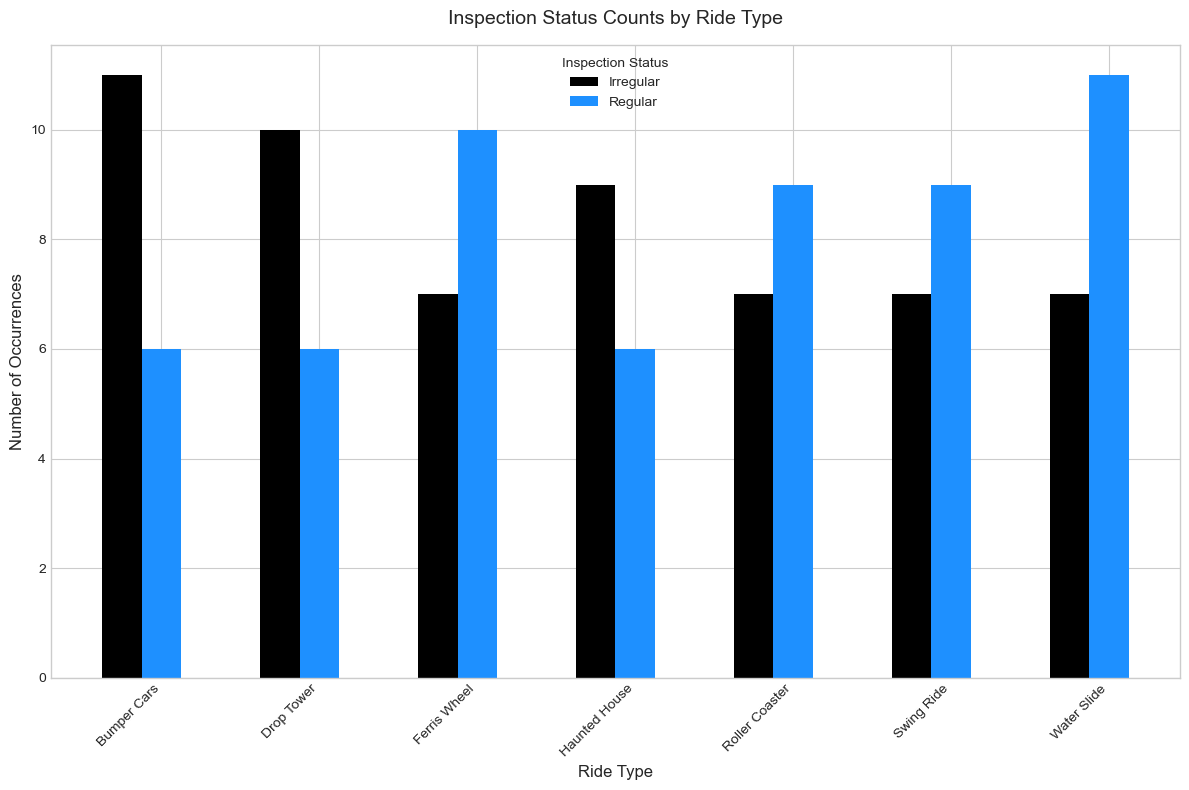

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataset
df = pd.read_csv('circus_rides_death_analysis.csv')

# Grouping by Ride and Inspection_Status to get counts
inspection_counts = df.groupby(['Ride', 'Inspection_Status']).size().unstack(fill_value=0)

# Creating a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar positions and width
bar_width = 0.25
rides = inspection_counts.index
n_statuses = len(inspection_counts.columns)
x = range(len(rides))

# Colors: using black and shades of blue
colors = ['#000000', '#1E90FF', '#4682B4']  # Black, DodgerBlue, SteelBlue

# Plotting bars for each inspection status
for i, status in enumerate(inspection_counts.columns):
    ax.bar(
        [pos + i * bar_width for pos in x],
        inspection_counts[status],
        bar_width,
        label=status,
        color=colors[i % len(colors)]
    )

# Customizing the plot
ax.set_title('Inspection Status Counts by Ride Type', fontsize=14, pad=15)
ax.set_xlabel('Ride Type', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(rides, rotation=45, ha='right')
ax.legend(title='Inspection Status')
plt.tight_layout()

# Displaying the plot
plt.show()

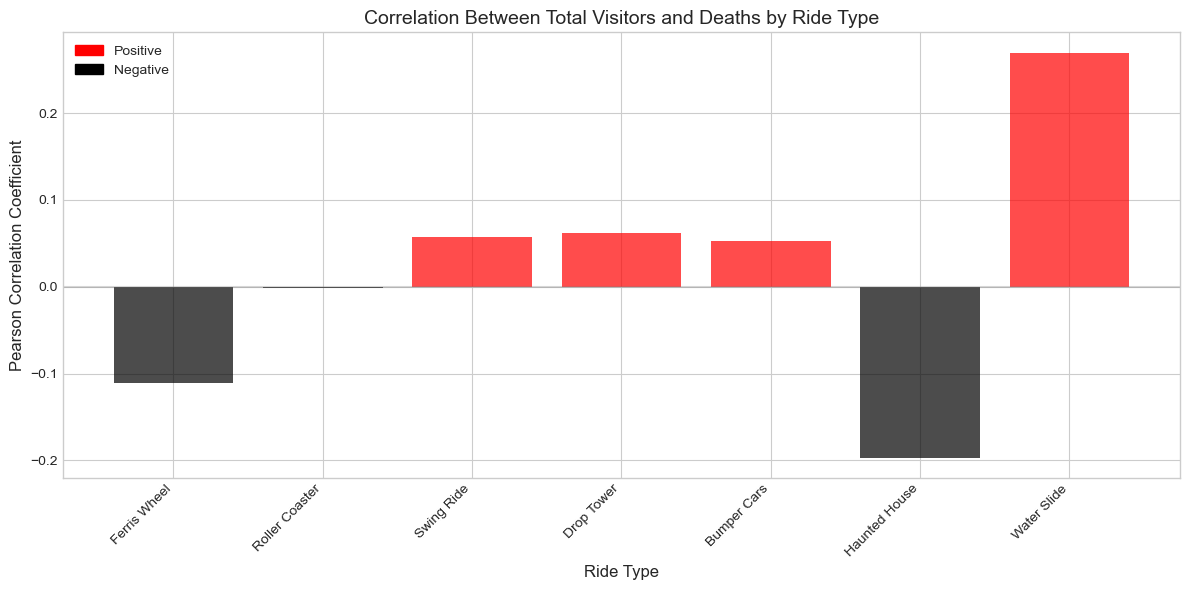

Ferris Wheel: -0.111
Roller Coaster: -0.001
Swing Ride: 0.058
Drop Tower: 0.062
Bumper Cars: 0.053
Haunted House: -0.197
Water Slide: 0.270


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Reading the dataset
df = pd.read_csv('circus_rides_death_analysis.csv')

# Calculate correlation by ride type
ride_correlations = {}
for ride in df['Ride'].unique():
    ride_data = df[df['Ride'] == ride]
    if len(ride_data) > 1:  # Need at least 2 points for correlation
        corr, _ = pearsonr(ride_data['Total_Visitors'], ride_data['Deaths'])
        ride_correlations[ride] = corr

# Prepare data for plotting
rides = list(ride_correlations.keys())
corrs = list(ride_correlations.values())
colors = ['red' if corr > 0 else 'black' for corr in corrs]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(rides, corrs, color=colors, alpha=0.7)
plt.title('Correlation Between Total Visitors and Deaths by Ride Type', fontsize=14)
plt.xlabel('Ride Type', fontsize=12)
plt.ylabel('Pearson Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.legend(handles=[plt.Rectangle((0,0),1,1, color='red', label='Positive'), 
                   plt.Rectangle((0,0),1,1, color='black', label='Negative')], loc='upper left')
plt.tight_layout()
plt.show()

# Print correlations for reference
for ride, corr in ride_correlations.items():
    print(f"{ride}: {corr:.3f}")

In [121]:
data=df.groupby("Location")["Total_Visitors"].sum().sort_values(ascending=False)
data

Location
Brazil       828318
India        811620
USA          802051
UK           735830
Germany      686816
Japan        648413
Australia    438620
Name: Total_Visitors, dtype: int64

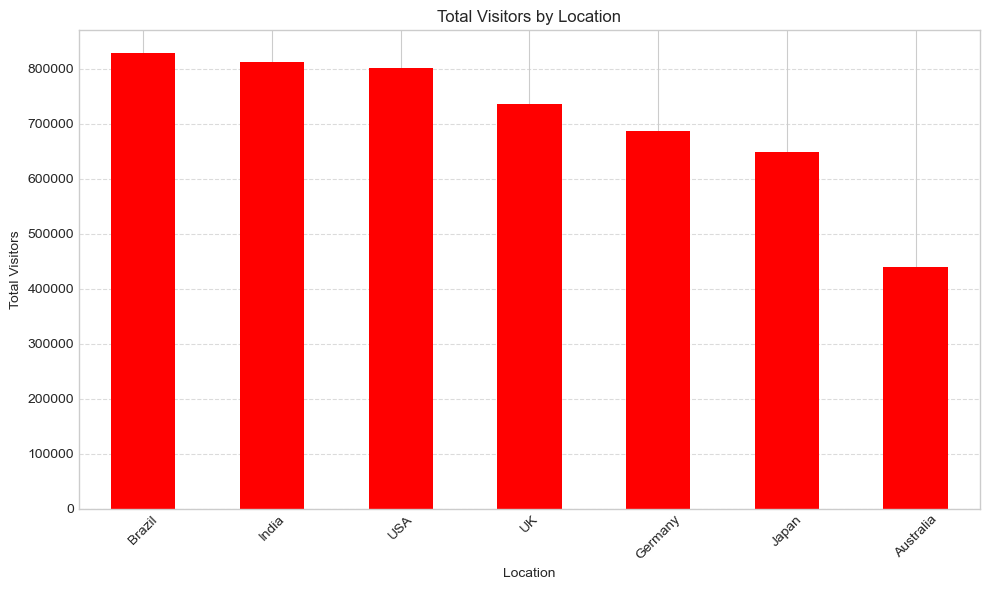

Total Visitors by Location:
Location
Brazil       828318
India        811620
USA          802051
UK           735830
Germany      686816
Japan        648413
Australia    438620
Name: Total_Visitors, dtype: int64


In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('circus_rides_death_analysis.csv')

# Calculate total visitors by location
total_visitors_by_location = data.groupby('Location')['Total_Visitors'].sum().sort_values(ascending=False)

# Create visualization
plt.figure(figsize=(10, 6))
total_visitors_by_location.plot(kind='bar', color='red')
plt.title('Total Visitors by Location')
plt.xlabel('Location')
plt.ylabel('Total Visitors')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print results
print("Total Visitors by Location:")
print(total_visitors_by_location)